<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

With remote work on the rise, digital nomads seek destinations that offer affordability, quality of life, and reliable digital infrastructure. This project aims to rank countries based on key factors, including economic viability (GNI per capita, adjusted for purchasing power parity - PPP), well-being (life expectancy, happiness score), and digital accessibility (internet penetration). Using data-driven analysis, we will identify the top locations for digital nomads within a three-month timeframe, providing actionable insights for individuals seeking the best place to live and work remotely.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

### Data


* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars
* [`gnipercapita_ppp_current_international.csv`](./data/gnipercapita_ppp_current_international.csv): Gross National Income (GNI) per capita adjusted for Purchasing Power Parity (PPP).  

- [`hapiscore_whr.csv`](./data/hapiscore_whr.csv): Happiness score based on the World Happiness Report.  

- [`internet_users.csv`](./data/internet_users.csv): Percentage of the population using the internet by country.  

### Outside Research


- **Cost of Living**: Affordability remains a primary factor. Countries like **Thailand**, **Vietnam**, and **Indonesia** offer lower living expenses, making them attractive to many digital nomads. For instance, cities like Chiang Mai in Thailand are renowned for their budget-friendly lifestyle.

- **Quality of Life**: European nations such as **Portugal** and **Spain** are favored for their high quality of life, robust infrastructure, and favorable climates. These countries also offer digital nomad visas, facilitating longer stays for remote workers.

- **Digital Infrastructure**: Reliable internet and coworking spaces are essential. Urban centers in countries like **Estonia** and **Germany** are known for their advanced digital infrastructure, supporting seamless remote work.

- **Visa Policies**: The availability and ease of obtaining digital nomad visas significantly influence destination choices. Countries such as **Costa Rica**, **Georgia**, and **Malta** have introduced visas specifically tailored for digital nomads, often with straightforward application processes.

**Emerging Trends:**

- **Attracting Talent**: Nations are increasingly recognizing the economic benefits of attracting digital nomads. For example, **New Zealand** has eased visa regulations to welcome remote workers, aiming to boost its economy and tourism sector.

- **Community Development**: Cities like **Marbella** in Spain are transforming into year-round hubs for young entrepreneurs and digital nomads, driven by burgeoning tech scenes and high-quality living standards.

**Sources:**
- https://visaguide.world/digital-nomad-visa/digital-nomad-index
- https://digitalnomadlifestyle.com/cheap-digital-nomad-destinations-southeast-asia-2025/
- https://nomadcapitalist.com/global-citizen/freedom/best-countries-for-digital-nomads/
- https://www.globalcitizensolutions.com/best-countries-for-digital-nomads/

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:

def calculate_mean(values):
    # Calculating the sum of all the values
    total = 0
    for val in values:
        total += val
    # Calculating how many values inputted
    num = 0
    for _ in values:
        num += 1
    # Calculating the mean only if num != 0
    if num == 0:
        return 0
    else:
        return total / num
# Test cases
test_list = [10, 12, 14, 22, 24, 36, 38]
print("Mean:", calculate_mean(test_list))


Mean: 22.285714285714285


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def calculate_std(values):
    mean_val = calculate_mean(values)
    count = 0
    # The result of squared difference between each value and the mean of all values in the dataset 
    sq_diff = 0
    # Calculating using each of the value in the values inputted
    for val in values:
        count += 1
        sq_diff += (val - mean_val) ** 2
    if count == 0:
        return 0
    return (sq_diff / count) ** 0.5
print(calculate_std(test_list))

10.443238218569752


3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def number_conversion(s):
    abbreviation = {
        'k': 1000,
        'm': 1_000_000,
        'b': 1_000_000_000
    }
    s = s.lower() # To address the case when my data is like this "14k", "21k", etc.
    # If the last character in the string is one of the abbreviations
    if s[-1] in abbreviation:
        num = float(s[:-1]) # The numeric portion of the input - we use float for decimal data
        # We calculate the expected output by timing the integer before the abbreviation and the abbreviation value
        return int(num * abbreviation[s[-1]])  
    else: # Return the input value if there is no abbreviation to calculate
        return int(s)
test_cases = ['3M', '45K', '2.5M', '100B', '42k', '14k']
for test in test_cases:
    result = number_conversion(test)
    print(f"Input: {test}, Output: {result}")
    

Input: 3M, Output: 3000000
Input: 45K, Output: 45000
Input: 2.5M, Output: 2500000
Input: 100B, Output: 100000000000
Input: 42k, Output: 42000
Input: 14k, Output: 14000


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Importing the datasets
population = pd.read_csv('../data/population.csv')
life_exp = pd.read_csv('../data/life_expectancy.csv')
happy_scr = pd.read_csv('../data/hapiscore_whr.csv')
gni = pd.read_csv('../data/gnipercapita_ppp_current_international.csv')
internet_users = pd.read_csv('../data/internet_users.csv')

In [6]:
# 1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
print("Population Data:")
print(population.head())
print("\nLife Expectancy Data:")
print(life_exp.head())
print("\nHappiness Score Data:")
print(happy_scr.head())
print("\nGNI Data:")
print(gni.head())
print("\nInternet Users Data:")
print(internet_users.head())

Population Data:
                country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M  3.28M   
1                Angola  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M  1.57M   
2               Albania   400k   402k   404k   405k   407k   409k   411k   
3               Andorra   2650   2650   2650   2650   2650   2650   2650   
4  United Arab Emirates  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k  40.2k   

    1807   1808  ...   2091   2092   2093   2094   2095   2096   2097   2098  \
0  3.28M  3.28M  ...   108M   108M   109M   109M   109M   110M   110M   110M   
1  1.57M  1.57M  ...   125M   126M   127M   128M   129M   130M   131M   131M   
2   413k   414k  ...  1.35M  1.32M  1.29M  1.26M  1.23M  1.21M  1.18M  1.15M   
3   2650   2650  ...  62.5k  62.2k  61.9k  61.7k  61.4k  61.2k  60.9k  60.7k   
4  40.2k  40.2k  ...  13.5M  13.5M  13.6M  13.7M  13.8M  13.8M  13.9M    14M   

    2099   2100  
0   111M   111M  
1   132M 

In [7]:
# 2. Check for missing values.
print("Missing Values in Population Data:")
print(population.isnull().sum())
print("\nMissing Values in Life Expectancy Data:")
print(life_exp.isnull().sum())
print("\nMissing Values in Happiness Score Data:")
print(happy_scr.isnull().sum())
print("\nMissing Values in GNI Data:")
print(gni.isnull().sum())
print("\nMissing Values in Internet Users Data:")
print(internet_users.isnull().sum())

Missing Values in Population Data:
country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       1
2097       1
2098       1
2099       1
2100       1
Length: 302, dtype: int64

Missing Values in Life Expectancy Data:
country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64

Missing Values in Happiness Score Data:
country      0
2005       137
2006        75
2007        62
2008        54
2009        51
2010        41
2011        19
2012        24
2013        28
2014        20
2015        22
2016        23
2017        17
2018        23
2019        21
2020        48
2021        42
2022        24
2023        26
dtype: int64

Missing Values in GNI Data:
country     0
1990       24
1991       20
1992       19
1993       18
1994       17
1995       17
1996       17
1997       15
1998       15
1999       14
2000       13
2001       13
2002       13
2003   

In [8]:
# 3. Display data types of each feature
print("Data Types in Population Data:")
print(population.dtypes)
print("\nData Types in Life Expectancy Data:")
print(life_exp.dtypes)
print("\nData Types in Happiness Score Data:")
print(happy_scr.dtypes)
print("\nData Types in GNI Data:")
print(gni.dtypes)
print("\nData Types in Internet Users Data:")
print(internet_users.dtypes)

# Reshaping datasets to long format

population = population.melt(id_vars=['country'], var_name='year', value_name='pop_value')
gni = gni.melt(id_vars=['country'], var_name='year', value_name='gni_value')
life_exp = life_exp.melt(id_vars=['country'], var_name='year', value_name='life_expectancy_value')
happy_scr = happy_scr.melt(id_vars=['country'], var_name='year', value_name='happiness_score_value')
internet_users = internet_users.melt(id_vars=['country'], var_name='year', value_name='internet_users_value')


Data Types in Population Data:
country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

Data Types in Life Expectancy Data:
country     object
1800       float64
1801       float64
1802       float64
1803       float64
            ...   
2096       float64
2097       float64
2098       float64
2099       float64
2100       float64
Length: 302, dtype: object

Data Types in Happiness Score Data:
country     object
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
2023       float64
dtype: object

Data Types in GNI Data:
country    obje

In [9]:
# 4. Dropping unnecessary rows
population.dropna(inplace=True)
life_exp.dropna(inplace=True)
happy_scr.dropna(inplace=True)
gni.dropna(inplace=True)
internet_users.dropna(inplace=True)

In [10]:
# 5. Display data types of each feature
print("\nData Types in Population Data:")
print(population.dtypes)
print("\nData Types in Life Expectancy Data:")
print(life_exp.dtypes)
print("\nData Types in Happiness Score Data:")
print(happy_scr.dtypes)
print("\nData Types in GNI Data:")
print(gni.dtypes)
print("\nData Types in Internet Users Data:")
print(internet_users.dtypes)


Data Types in Population Data:
country      object
year         object
pop_value    object
dtype: object

Data Types in Life Expectancy Data:
country                   object
year                      object
life_expectancy_value    float64
dtype: object

Data Types in Happiness Score Data:
country                   object
year                      object
happiness_score_value    float64
dtype: object

Data Types in GNI Data:
country      object
year         object
gni_value    object
dtype: object

Data Types in Internet Users Data:
country                 object
year                    object
internet_users_value    object
dtype: object


In [11]:
# 6. Fix any incorrect data types found in step 5.
# Function to convert all year columns with abbreviated numbers
# Population and GNI have the same format and require conversion to be integer
def convert_abbreviated_numbers(df):
    year_columns = [col for col in df.columns if col not in ['country']]
    for col in year_columns:
        df[col] = df[col].astype(str).apply(number_conversion)
    return df

population = convert_abbreviated_numbers(population)
gni = convert_abbreviated_numbers(gni)

In [12]:
# 7. Rename Columns.
# Function to rename columns if needed
def rename_columns(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    return df

In [13]:
# 9. Merging dataframes on common keys (country and year)

# Only focus on these countries from the outreach session above
# List of countries to focus on
selected_countries = [
    'Thailand', 'Vietnam', 'Indonesia',  # Cost of living
    'Portugal', 'Spain',  # Quality of life
    'Estonia', 'Germany',  # Digital infrastructure
    'Costa Rica', 'Georgia', 'Malta',  # Visa policies
    'New Zealand'  # Attracting talent
]

# Convert year column to integer
def convert_year_column(df):
    df['year'] = pd.to_numeric(df['year'])
    df.dropna(subset=['year'], inplace=True)  # Remove any NaN years
    df['year'] = df['year'].astype(int)  # Convert to integer
    return df

# Apply conversion to all datasets
population = convert_year_column(population)
gni = convert_year_column(gni)
life_exp = convert_year_column(life_exp)
happy_scr = convert_year_column(happy_scr)
internet_users = convert_year_column(internet_users)


# Filter data for 2005 and later for better data credibility
start_year = 2005
population = population[(population['year'] >= start_year) & (population['country'].isin(selected_countries))]
life_exp = life_exp[(life_exp['year'] >= start_year) & (life_exp['country'].isin(selected_countries))]
happy_scr = happy_scr[(happy_scr['year'] >= start_year) & (happy_scr['country'].isin(selected_countries))]
gni = gni[(gni['year'] >= start_year) & (gni['country'].isin(selected_countries))]
internet_users = internet_users[(internet_users['year'] >= start_year) & (internet_users['country'].isin(selected_countries))]

In [14]:
# Merging for the targeted countries, years and features to compare dataset
df_merged = population.merge(life_exp, on=['country','year'], how='inner')
df_merged = df_merged.merge(happy_scr, on=['country','year'], how='inner')
df_merged = df_merged.merge(gni, on=['country','year'], how='inner')
df_merged = df_merged.merge(internet_users, on=['country','year'], how='inner')

df_merged.head(40)

,country,year,pop_value,life_expectancy_value,happiness_score_value,gni_value,internet_users_value
0,Germany,2005,81200000,79.6,66.2,32100,68.7
1,Spain,2005,43700000,80.6,71.5,27200,47.9
2,Costa Rica,2006,4380000,79.1,70.8,10500,25.1
3,Estonia,2006,1350000,73.3,53.7,18300,63.5
4,Georgia,2006,3930000,71.5,36.8,6100,7.53
5,Indonesia,2006,232000000,68.4,49.5,6300,4.76
6,New Zealand,2006,4179999,80.0,73.0,25900,69.0
7,Portugal,2006,10500000,79.2,54.0,24000,38.0
8,Thailand,2006,66300000,75.4,58.9,10500,17.2
9,Vietnam,2006,84000000,72.9,52.9,4170,17.3


In [15]:
df_merged.to_csv("../data/cleaned_data.csv", index=False)

### Data Dictionary

This dataset contains information about countries that are popular among digital nomads, focusing on cost of living, quality of life, digital infrastructure, and visa policies. The dataset includes data from **2005 onward** to ensure the accountability of all row records in all the pre-merged datasets and consists of the following features:

| Feature | Type | Dataset | Description |
|---|---|---|---|
| **country** | *string* | Merged Dataset | Name of the country. |
| **year** | *integer* | Merged Dataset | Year of the recorded data. |
| **pop_value** | *integer* | Population Data | Total population of the country in the given year. |
| **life_expectancy_value** | *float* | Life Expectancy Data | The average life expectancy (in years) at birth. |
| **happiness_score_value** | *float* | Happiness Score Data | The national happiness score based on survey responses. |
| **gni_value** | *float* | GNI Data | Gross National Income per capita adjusted for Purchasing Power Parity (PPP) in international dollars. |
| **internet_users_value** | *float* | Internet Users Data | Percentage of individuals using the internet in the country. |

### **Data Source:**
- The datasets were retrieved from publicly available sources, including **[Gapminder](https://www.gapminder.org/data/)** 
- The merged dataset focuses on countries that are recognized as top destinations for digital nomads.

## Exploratory Data Analysis

## 1. Summary Statistics And Standard Deviation Calculation

In [16]:
# Import cleaned dataset as df
df = pd.read_csv("../data/cleaned_data.csv")

In [17]:
# 1. Summary Statistics.
df_merged.describe()

,year,pop_value,life_expectancy_value,happiness_score_value,gni_value
count,190.000000,1.900000e+02,190.000000,190.000000,190.000000
mean,2014.684211,5.402107e+07,78.015263,60.440000,25761.147368
std,5.132660,7.404784e+07,4.131288,8.971512,15190.856132
min,2005.000000,4.160000e+05,68.400000,36.800000,4170.000000
25%,2010.250000,3.887500e+06,74.000000,53.700000,12050.000000
50%,2015.000000,1.050000e+07,79.750000,61.550000,24500.000000
75%,2019.000000,8.147500e+07,81.400000,67.300000,36700.000000
max,2023.000000,2.780000e+08,83.600000,76.200000,70700.000000


In [18]:
# 2. Calculate STD for each of the column
sd = {col: calculate_std(df[col]) for col in df.select_dtypes(include=['number']).columns}
print(sd)

{'year': 5.119134708737893, 'pop_value': 73852716.25542405, 'life_expectancy_value': 4.120402213914575, 'happiness_score_value': 8.947871255220427, 'gni_value': 15150.827455581722, 'internet_users_value': 25.319979685830297}


### **Summary Statistics: Key Findings**

- The dataset stretches from **2005 to 2023**, with an average of **2014.68**. This shows data spread evenly across nearly two decades. 
- On average, countries have a population of **54 million**. However, a hefty standard deviation of **73.85 million** points to a wide gap between smaller and larger nations. 
- **Life expectancy** averages **78 years**, with low variability (**STD = 4.12**). This suggests most countries cluster closely around this figure.
- **Happiness scores** have a mean of **60.44**, but with a **higher standard deviation (8.95)**, reveals some countries enjoy far greater well-being than others. 
- **GNI per capita** has an average of **25,761 USD**, but a standard deviation of **15,190 USD**, showing large economic disparities.
- **Internet penetration (std = 25.32)** also varies significantly, indicating differing levels of digital access.  

From an inferential perspective, the large standard deviations in **population, income, and internet usage** suggest that further segmentation (e.g., by region or economic status) could provide deeper insights into global development trends.


## 2. Dataset Trend Analysis

### Which countries have shown the most significant improvement in internet penetration over the past decade?
Internet accessibility, which is a non-negotiable for remote work, is crucial for digital nomads who rely on reliable connectivity for remote work. Understanding the distribution helps identify countries with high internet usage. Countries with high internet penetration (e.g., above 70%) could be potential destinations for digital nomads.

In [19]:
# a. Which countries have shown the most significant improvement in internet penetration over the past decade?
latest_year = df["year"].max()
past_year = latest_year - 10

# Filter dataset for the past 10 years
df_last_10_years = df[df["year"] >= past_year]

# Calculate percentage change in internet penetration for each country
internet_growth = df_last_10_years.groupby("country")["internet_users_value"].agg(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
).dropna()

# Sort the results in descending order to find the top 5 countries
top_internet_growth = internet_growth.sort_values(ascending=False)
# Display the top 5 countries
print(top_internet_growth.head(5))

country
Indonesia     364.429530
Thailand      209.688581
Vietnam       102.857143
Georgia        89.145497
Costa Rica     85.000000
Name: internet_users_value, dtype: float64


### Insights on Internet Penetration Growth

The analysis reveals that **Indonesia, Thailand, Vietnam, Georgia, and Costa Rica** have experienced the most significant growth in internet penetration over the past decade. Indonesia leads with a remarkable **364% increase**, highlighting substantial improvements in digital infrastructure. Thailand follows with **209% growth**, while Vietnam, Georgia, and Costa Rica have also seen notable expansion. These trends indicate emerging digital hubs, making them attractive destinations for remote work and digital nomads. The rapid internet growth suggests increased investments in connectivity, positioning these countries as potential hotspots for tech-savvy professionals seeking affordable yet well-connected locations.


### Which countries with the highest internet penetration growth have also experienced significant population growth?
Understanding the relationship between internet penetration and population growth is essential in assessing a country's digital infrastructure progress. If internet penetration is increasing at a faster rate than population growth, it signals strong investment in digital connectivity, suggesting that the country is prioritizing technological advancement and accessibility. However, if both internet and population growth are rising at similar rates, it may indicate that internet expansion is merely keeping pace with demand rather than reflecting significant infrastructure improvements. Identifying countries where internet penetration growth outpaces population growth helps highlight nations that are actively investing in tech-driven development, making them attractive destinations for digital nomads and remote professionals.

Countries with significantly higher internet penetration growth compared to population growth are likely prioritizing digital infrastructure, making them emerging tech hubs with improved connectivity, affordability, and remote work opportunities.

In [20]:
# b. Which countries with the highest internet penetration growth have also experienced significant population growth?
# Calculate percentage change in population for each country over the last 10 years
population_growth = df_last_10_years.groupby("country")["pop_value"].agg(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
).dropna()

# Merge population growth with internet growth data
growth_comparison = pd.DataFrame({
    "internet_growth_percentage": internet_growth,
    "population_growth_percentage": population_growth
}).dropna()

# Identify countries where internet penetration growth is higher than population growth
growth_comparison["growth_difference"] = (
    growth_comparison["internet_growth_percentage"] - growth_comparison["population_growth_percentage"]
)
# Sort by the largest positive difference
top_internet_vs_population = growth_comparison.sort_values(by="growth_difference", ascending=False)

print(top_internet_vs_population.head(5))

            internet_growth_percentage  population_growth_percentage  \
country                                                                
Indonesia                   364.429530                      9.881423   
Thailand                    209.688581                      3.160920   
Vietnam                     102.857143                      9.523810   
Georgia                      89.145497                     -1.583113   
Costa Rica                   85.000000                      8.768267   

            growth_difference  
country                        
Indonesia          354.548107  
Thailand           206.527662  
Vietnam             93.333333  
Georgia             90.728610  
Costa Rica          76.231733  


### **Insights from Internet and Population Growth Analysis**

Our analysis highlights that **Indonesia, Thailand, Vietnam, Georgia, and Costa Rica** have seen the most significant internet penetration growth over the past decade. However, when compared to population growth, these countries show a clear trend of **digital expansion outpacing demographic changes**, signaling strong investment in digital infrastructure.

- **Indonesia** leads with a **364% increase in internet penetration**, while its population grew by only **9.88%**, resulting in a **354% difference**.
- **Thailand** follows with a **209% rise in internet penetration**, while its population increased by only **3.16%**, leading to a **206% difference**.
- **Vietnam, Georgia, and Costa Rica** also exhibit notable gaps between internet and population growth, suggesting proactive efforts to improve connectivity.



### Which countries with the highest internet penetration growth also show improvements in life expectancy and economic well-being (GNI per capita PPP)?
While internet penetration is crucial for digital nomads and remote professionals, a country’s overall quality of life and economic stability play a significant role in long-term livability. By analyzing life expectancy and GNI per capita PPP alongside internet growth, we can identify destinations that not only offer excellent digital connectivity but also provide a healthy and economically viable environment.
Countries that exhibit high internet growth, rising life expectancy, and economic improvements are likely top-tier destinations for digital nomads. These nations would provide strong digital infrastructure, a good standard of living, and economic stability, making them ideal for long-term remote work and residency.

In [21]:
# c. Which countries with the highest internet penetration growth also show improvements in life expectancy and economic well-being (GNI per capita PPP)?

# Calculate percentage change in life expectancy for each country over the last 10 years
life_expectancy_growth = df_last_10_years.groupby("country")["life_expectancy_value"].agg(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
).dropna()

# Calculate percentage change in GNI per capita PPP for each country over the last 10 years
gni_growth = df_last_10_years.groupby("country")["gni_value"].agg(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
).dropna()

# Merge internet growth, life expectancy growth, and GNI growth data
growth_comparison_2 = pd.DataFrame({
    "internet_growth_percentage": internet_growth,
    "life_expectancy_growth_percentage": life_expectancy_growth,
    "gni_growth_percentage": gni_growth
}).dropna()

# Identify countries with strong internet growth along with improvements in life expectancy and economic well-being
growth_comparison_2["combined_growth_score"] = (
    growth_comparison_2["internet_growth_percentage"] +
    growth_comparison_2["life_expectancy_growth_percentage"] +
    growth_comparison_2["gni_growth_percentage"]
)

# Sort by the highest combined growth score
top_countries_for_nomads = growth_comparison_2.sort_values(by="combined_growth_score", ascending=False).head(5)

# Display the results
print(top_countries_for_nomads)


            internet_growth_percentage  life_expectancy_growth_percentage  \
country                                                                     
Indonesia                   364.429530                           3.000000   
Thailand                    209.688581                           1.410256   
Vietnam                     102.857143                           1.766304   
Georgia                      89.145497                           1.508916   
Costa Rica                   85.000000                           0.497512   

            gni_growth_percentage  combined_growth_score  
country                                                   
Indonesia               56.739812             424.169342  
Thailand                61.267606             272.366443  
Vietnam                117.457887             222.081334  
Georgia                117.924528             208.578941  
Costa Rica              78.231293             163.728805  


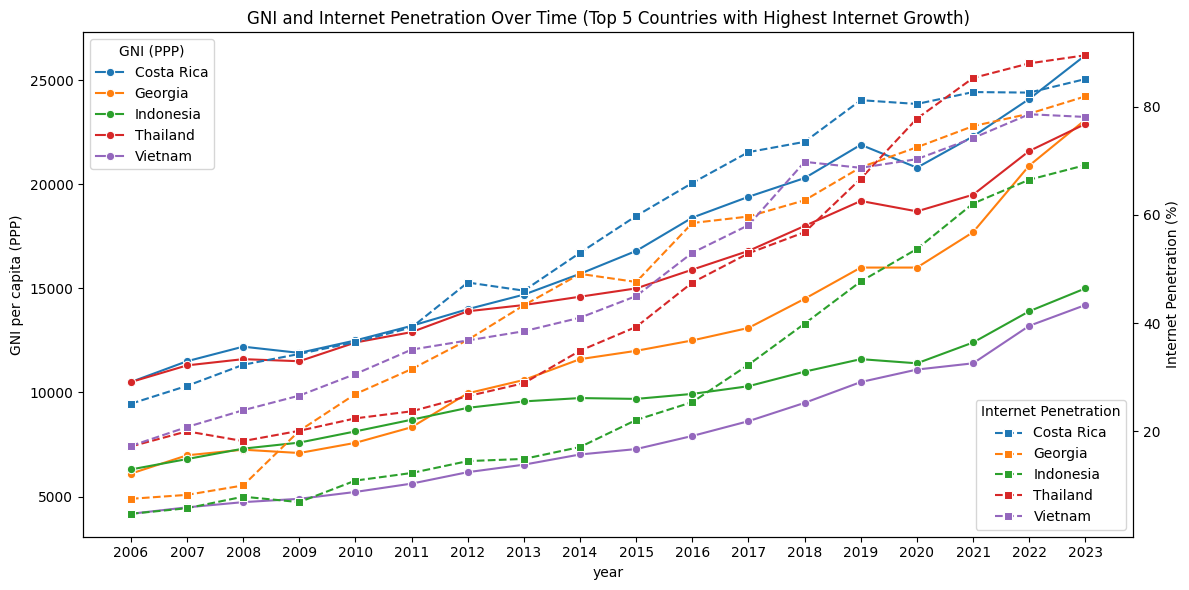

In [22]:
# Calculate the most significant improvement in internet penetration over the past decade
latest_year = df["year"].max()
past_year = latest_year - 10

# Filter dataset for the past 10 years
df_last_10_years = df[df["year"] >= past_year]

# Calculate percentage change in internet penetration for each country
internet_growth = df_last_10_years.groupby("country")["internet_users_value"].agg(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
).dropna()

# Sort the results in descending order to find the top 5 countries
top_internet_growth = internet_growth.sort_values(ascending=False)
top_5_countries = top_internet_growth.head(5).index

# Filter dataset for these countries
df_top_5 = df[df["country"].isin(top_5_countries)]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GNI on primary y-axis
gni_plot = sns.lineplot(data=df_top_5, x="year", y="gni_value", hue="country", marker='o', ax=ax1)
ax1.set_ylabel("GNI per capita (PPP)")
ax1.set_title("GNI and Internet Penetration Over Time (Top 5 Countries with Highest Internet Growth)")

# Create secondary y-axis for Internet Penetration
ax2 = ax1.twinx()
internet_plot = sns.lineplot(data=df_top_5, x="year", y="internet_users_value", hue="country", marker='s', ax=ax2, linestyle='--')
ax2.set_ylabel("Internet Penetration (%)")

# Adjust x-axis ticks
plt.xticks(np.arange(df_top_5["year"].min(), df_top_5["year"].max() + 1, 1), rotation=45)

# Create two legends: One for GNI and one for Internet Penetration
gni_legend = ax1.legend(loc='upper left', title="GNI (PPP)")
ax2.legend(loc='lower right', title="Internet Penetration")

# Show plot
plt.tight_layout()
plt.show()


### **Insights from Internet, Life Expectancy, and GNI Growth Analysis**

Our analysis identifies **Indonesia, Thailand, Vietnam, Georgia, and Costa Rica** as the top countries where **internet penetration, life expectancy, and economic well-being (GNI per capita PPP)** have significantly improved over the past decade.  

- **Indonesia** leads in overall combined growth, driven primarily by its **364% internet growth** and **56.7% GNI growth**, alongside a **3% increase in life expectancy**. This suggests a well-balanced digital and economic transformation.  
- **Vietnam and Georgia** stand out due to their **remarkable GNI growth of 117%**, indicating rapid economic expansion. Vietnam also exceeded Thailand in **life expectancy growth (1.76% vs. 1.41%)**, highlighting potential improvements in healthcare and living conditions.  
- **Thailand**, despite its strong **209% internet growth** and a **61% rise in GNI**, shows relatively moderate life expectancy growth, suggesting economic progress that may not be translating as rapidly into healthcare advancements.  
- **Costa Rica**, while having moderate internet and economic growth, shows the lowest life expectancy increase (**0.49%**), possibly implying that infrastructure investments are being prioritized over health-related advancements.  


### **How Does Happiness Score Growth Correlate with Economic and Digital Growth?**  

While **internet penetration and economic growth** are crucial for digital nomads, overall **quality of life** plays a key role in choosing a long-term remote work destination. The **happiness score** reflects societal well-being, life satisfaction, and work-life balance—factors that greatly influence a country’s livability. By examining how **happiness score growth** aligns with **GNI per capita** and **internet penetration growth**, we can identify destinations that are not just economically and digitally thriving but also offer a high **quality of life**.  

- **Balanced Growth Nations:** Countries where **happiness, internet penetration, and GNI per capita are all growing**, suggesting strong societal and economic progress.  
- **Hidden Gems:** Countries where **happiness is rising despite low GNI growth**, indicating **affordable, high-quality living environments**—ideal for digital nomads on a budget.  
- **Tech-Driven Well-Being:** Countries where **happiness aligns with internet growth**, suggesting that **digital accessibility and remote work culture are enhancing quality of life**.  

This analysis will help **identify the best work-life balance destinations**, guiding remote professionals towards **economically stable, digitally connected, and personally fulfilling** locations.


In [23]:
# d. How Does Happiness Score Growth Correlate with Economic and Digital Growth?
# Calculate percentage change in happiness score for each country over the last 10 years
happiness_growth = df_last_10_years.groupby("country")["happiness_score_value"].agg(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100 if len(x) > 1 else None
).dropna()

# Merge happiness growth with the combined growth score from life expectancy, internet, and GNI
happiness_impact_comparison = pd.DataFrame({
    "happiness_growth_percentage": happiness_growth,
    "combined_growth_score": growth_comparison_2["combined_growth_score"]
}).dropna()

# Sort by happiness growth to see the strongest improvements in happiness as a standalone factor
top_happiness_impact = happiness_impact_comparison.sort_values(by="happiness_growth_percentage", ascending=False).head(5)

# Display the results
print(top_happiness_impact)


           happiness_growth_percentage  combined_growth_score
country                                                      
Vietnam                      26.095618             222.081334
Georgia                      22.988506             208.578941
Estonia                      19.739292              87.343322
Portugal                     15.310078             106.433877
Indonesia                     7.750473             424.169342


### **Insights from Happiness Score Growth Analysis**

Our analysis highlights **Vietnam and Georgia** as the top two countries experiencing the most significant **happiness score growth** over the past decade. While **internet penetration, GNI per capita, and life expectancy improvements** have been strong indicators of development, these results suggest that **economic growth alone does not fully explain national well-being**.

- **Vietnam** leads with a **26.1% increase in happiness**, despite ranking **third in combined economic and digital growth**. This suggests that improvements in **social stability, healthcare, and work-life balance** may be contributing to higher life satisfaction beyond just financial growth.
- **Georgia** follows with a **22.9% happiness growth**, reinforcing its **strong GNI per capita increase (117%)**. The high happiness score gain suggests that economic growth in Georgia is translating into real improvements in the **quality of life, public services, and overall well-being**.
- **Estonia and Portugal**, while not ranked as high in digital and economic growth, still show **notable happiness increases**, indicating that other factors, such as **governance, cultural shifts, or social policies**, could be contributing to improved national well-being.
- **Indonesia**, which ranked **first in combined economic and digital growth**, has a **relatively lower happiness growth (7.75%)**, suggesting that rapid economic transformation does not always translate into an equally strong increase in life satisfaction.


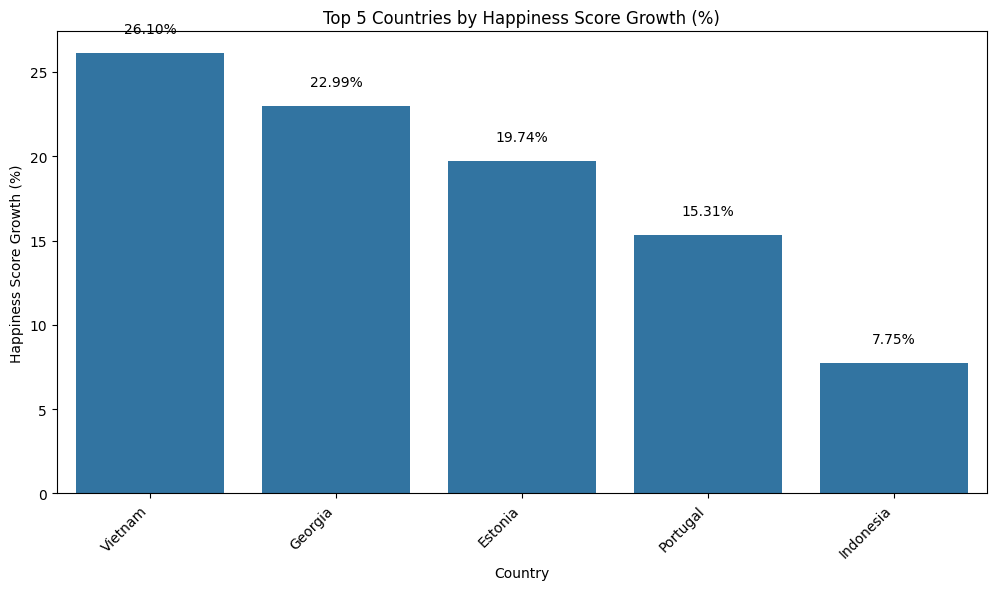

In [24]:
# Data visualization
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_happiness_impact.index, y=top_happiness_impact['happiness_growth_percentage'])

# Add labels and title
plt.title('Top 5 Countries by Happiness Score Growth (%)')
plt.xlabel('Country')
plt.ylabel('Happiness Score Growth (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add values on top of the bars
for index, value in enumerate(top_happiness_impact['happiness_growth_percentage']):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

### **Key Takeaways from the Analysis**

1. **Internet Growth Outpaces Population Growth**  
   Countries like **Indonesia, Thailand, Vietnam, Georgia, and Costa Rica** are experiencing **rapid internet expansion** that surpasses population growth, highlighting strong investments in digital infrastructure. This suggests these nations are emerging as **tech hubs** and attractive locations for digital nomads.

2. **Economic and Digital Development Are Not Always Correlated with Well-being**  
   While **Indonesia leads in overall economic and digital growth**, **Vietnam and Georgia** have experienced the highest **happiness score increases**. This suggests that **social policies, healthcare, and work-life balance** play a significant role in improving quality of life, not just economic expansion.

3. **Vietnam and Georgia: The Hidden Gems for Quality of Life**  
   Despite **not leading in combined economic and digital growth**, Vietnam and Georgia show **remarkable happiness growth** (26.1% and 22.9%, respectively). This indicates that these countries may offer **affordable living, social well-being, and work-life balance**, making them **ideal for budget-conscious digital nomads**.

4. **Economic Growth Does Not Guarantee Higher Happiness**  
   **Indonesia**, despite being the top performer in internet, GNI, and life expectancy growth, has **relatively low happiness growth (7.75%)**, suggesting that economic transformation does not always translate into well-being improvements. This could mean challenges related to **inequality, urban stress, or social policies**.

5. **Best Destinations for Remote Workers and Digital Nomads**  
   - For a **well-balanced digital and economic environment**: **Indonesia and Thailand**.  
   - For **affordable and high-quality living**: **Vietnam and Georgia**.  
   - For **strong economic development with stable growth**: **Estonia and Portugal**.


While digital infrastructure is a crucial factor, happiness and quality of life should be **equally prioritized** when selecting destinations for remote work. Vietnam and Georgia stand out as **affordable, high-growth, high-happiness** destinations, making them prime locations for digital nomads seeking both professional and personal fulfillment.


## 3. Visualize the Data

## Correlation Heatmap

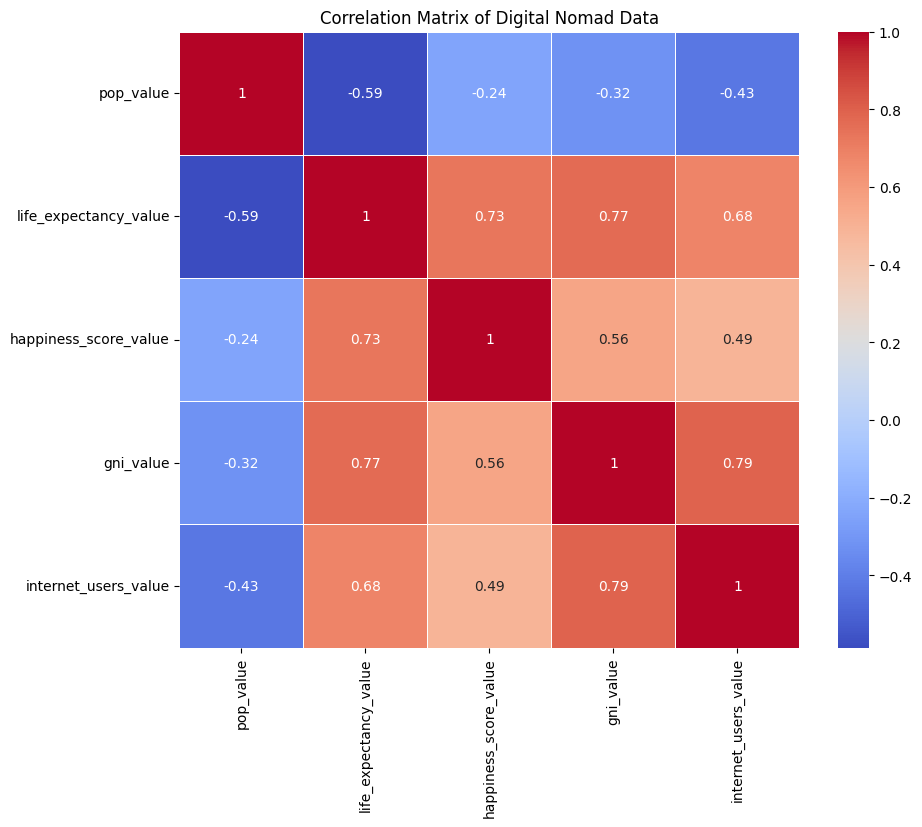

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['pop_value', 'life_expectancy_value', 'happiness_score_value', 'gni_value', 'internet_users_value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Digital Nomad Data')
plt.show()

### **Correlation Insights: Digital Nomad Data**

The correlation matrix reveals key relationships between economic, digital, and well-being factors. **GNI per capita** has a **strong positive correlation with life expectancy (0.77) and internet penetration (0.79)**, suggesting that economic development supports both health and digital infrastructure. **Happiness score correlates highly with life expectancy (0.73)**, indicating that well-being improves with longevity. Interestingly, **population size has a negative correlation with internet penetration (-0.43) and life expectancy (-0.59)**, implying that larger populations might face challenges in equitable digital access and healthcare. These insights help identify **ideal digital nomad destinations with strong economic and social well-being**.


## Histograms 

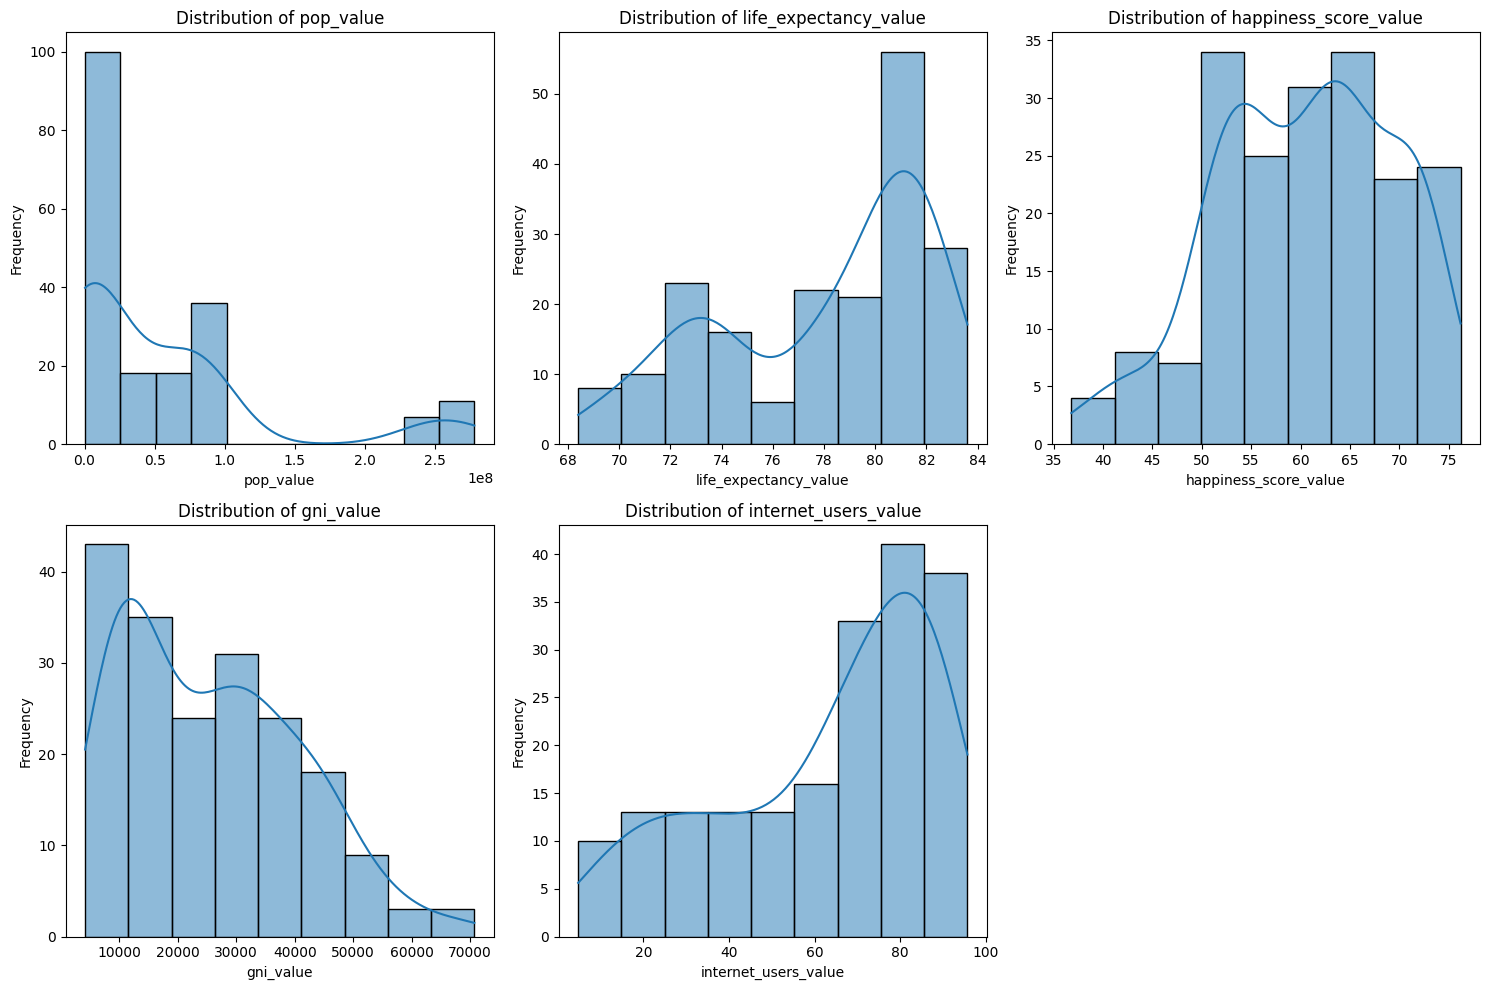

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['pop_value', 'life_expectancy_value', 'happiness_score_value', 'gni_value', 'internet_users_value']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### **Assessing Normality in the Dataset**
We typically assume that data sampled from a population follows a **normal distribution**, but our analysis of histograms and summary statistics suggests otherwise. Below is a breakdown of each variable:

#### **1. Population (pop_value) – Highly Right-Skewed**  
- **Mean:** 54M, **Std Dev:** 74M → Large variation, with extreme outliers.  
- **Min:** 416K, **Max:** 278M → A long right tail suggests a **few highly populated countries skewing the distribution**.  
- **Impact:** **Mean is unreliable** due to large outliers; **median-based estimates are better**.

#### **2. Life Expectancy (life_expectancy_value) – Slightly Bimodal**  
- **Mean:** 78.01 years, **Std Dev:** 4.13 years → Low variation, clustered around two peaks.  
- **Min:** 68.4, **Max:** 83.6 → Suggests **two distinct groups of countries with different healthcare levels**.  
- **Impact:** While **close to normal**, sub-group analysis (e.g., by income level) may reveal **latent patterns**.

#### **3. Happiness Score (happiness_score_value) – Nearly Normal**  
- **Mean:** 60.44, **Std Dev:** 8.97 → **Symmetrical shape** in the histogram.  
- **Min:** 36.8, **Max:** 76.2 → No extreme skewness, supporting normality assumptions.  
- **Impact:** **Parametric statistical tests (e.g., correlation, regression) are valid**.

#### **4. GNI per Capita (gni_value) – Right-Skewed**  
- **Mean:** 25,761, **Std Dev:** 15,190 → Large economic disparities across countries.  
- **Min:** 4,170, **Max:** 70,700 → A few high-income countries skew the data.  
- **Impact:** **Transformation (e.g., log scale) may be necessary** for meaningful economic analysis.

#### **5. Internet Users (internet_users_value) – Right-Skewed**  
- **Mean:** 62.77%, **Std Dev:** 25.39% → **Clusters at 80-100%** suggest widespread digital adoption.  
- **Min:** 4.76%, **Max:** 95.7% → Long right tail with **some lagging countries**.  
- **Impact:** A **binary classification (high vs. low penetration)** may be useful.

### Key Takeaways
- **Happiness Score is the closest to normality**, making it **suitable for standard parametric tests**.
- **Population, GNI, and Internet Users are heavily skewed**, requiring **median-based metrics or transformations**.
- **Life Expectancy exhibits a bimodal shape**, meaning segmentation (e.g., high-income vs. low-income) **is necessary for accurate inferences**.
- **Future Analysis:** Consider **log transformations, outlier handling, or alternative statistical methods** to improve normality assumptions.


## Boxplots: Life Expectancy and Happiness Score

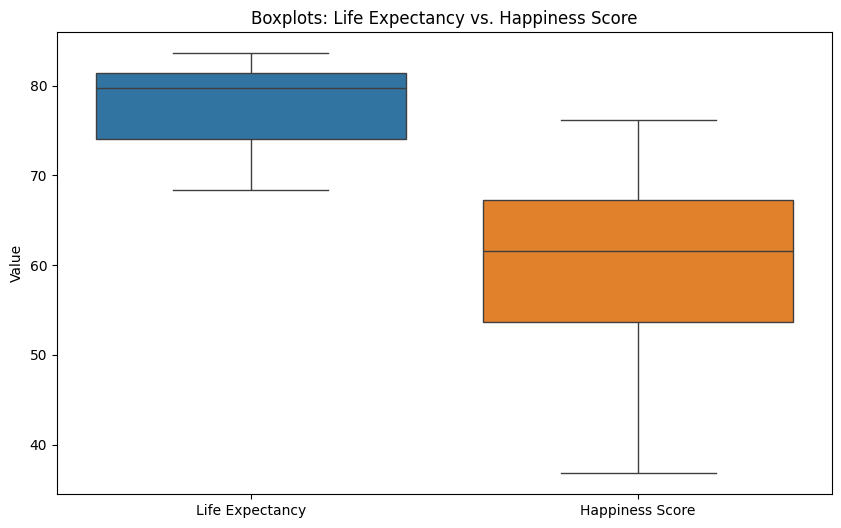

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['life_expectancy_value', 'happiness_score_value']])
plt.title('Boxplots: Life Expectancy vs. Happiness Score')
plt.ylabel('Value')
plt.xticks([0, 1], ['Life Expectancy', 'Happiness Score']) 
plt.show()


#### **Life Expectancy: A More Uniform Distribution**
- The **median life expectancy** sits around **80 years**, with most values closely packed around this mark.
- The **interquartile range (IQR)** is relatively small, indicating that **most countries have similar life expectancies**.
- Whiskers stretch from about **70 years** on the lower end to slightly over **80 years** on the upper end, showing **a limited range of variation**.
- No significant **outliers** are present, suggesting a **consistent trend in life expectancy across countries**.

#### **Happiness Score: More Variable Across Countries**
- The **median happiness score** is approximately **60**, lower than life expectancy.
- The **IQR is wider**, showing **more variability** in happiness scores compared to life expectancy.
- Whiskers extend from **about 45 to 75**, representing a broader spread.
- Unlike life expectancy, happiness scores appear **less uniform**, possibly influenced by diverse **economic, social, and cultural factors**.

### **Key Takeaways**
1. **Life Expectancy is More Consistent:**  
   - A **narrow IQR and shorter whiskers** indicate that **most countries have similar life expectancy levels**.  
   - Countries seem to follow **predictable healthcare and longevity trends**.

2. **Happiness Shows Greater Variability:**  
   - The **wider IQR and longer whiskers** suggest **happiness is less predictable** and influenced by **more diverse factors**.  
   - Countries may experience **similar life expectancy but differing happiness levels** due to **socioeconomic conditions, governance, or cultural aspects**.

3. **Life Expectancy vs. Happiness: No Direct Correlation**  
   - A **longer life does not always equate to higher happiness**.  
   - Some countries may have **high life expectancy but low happiness**, and vice versa.

4. **Future Investigation Needed:**  
   - Since happiness scores fluctuate more than life expectancy, exploring **factors like economic stability, work-life balance, and cultural expectations** may provide deeper insights.

## Scatter Plot: GNI per Capita vs. Internet Users (%)

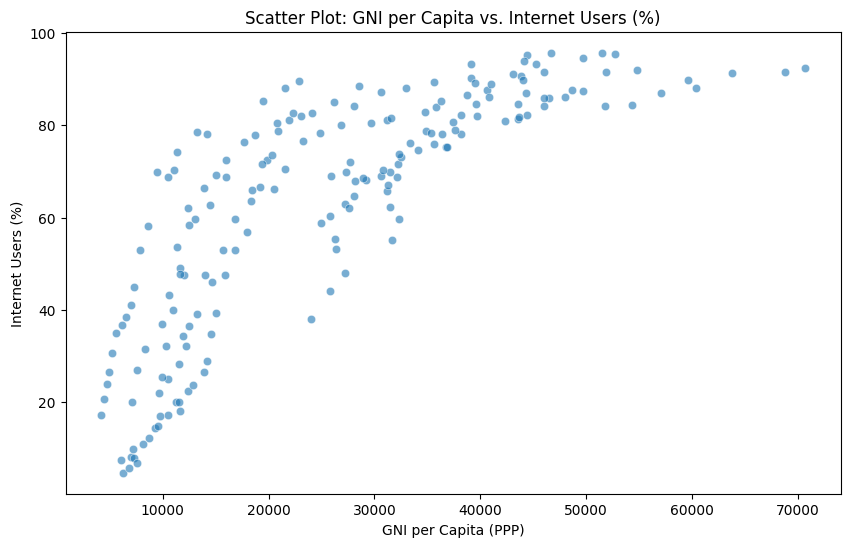

In [28]:
# Create a scatter plot for GNI per Capita vs. Internet Users (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["gni_value"], y=df["internet_users_value"], alpha=0.6)

# Label axes and title
plt.xlabel("GNI per Capita (PPP)")
plt.ylabel("Internet Users (%)")
plt.title("Scatter Plot: GNI per Capita vs. Internet Users (%)")

# Show the plot
plt.show()

1. **Strong Positive Correlation**  
   - The data points suggest a **clear upward trend**, meaning that as **GNI per capita increases, internet penetration also rises**.
   - This aligns with the correlation value of **0.79**, confirming that **wealthier nations tend to have better internet access**.

2. **Diminishing Returns at Higher GNI Levels**  
   - Countries with **GNI per capita exceeding ~$30,000** show a **plateau effect**, where internet penetration remains close to **90-100%**.
   - This suggests that beyond a certain income level, nearly all citizens have internet access, leaving little room for further growth.

3. **Lower-Income Nations Have Greater Variability**  
   - Countries with **GNI per capita below ~$15,000** exhibit **wider dispersion**, with internet penetration ranging from **as low as 5% to over 60%**.
   - This indicates that **economic factors alone do not fully determine internet access**, as some lower-income nations prioritize digital infrastructure more than others.

- **For remote workers:** Countries with high **internet penetration and moderate GNI per capita** could offer **affordable living** with **strong digital infrastructure**.
- **For policymakers:** Investments in **broadband infrastructure** can accelerate economic growth, particularly in **developing nations with low internet penetration**.

## Time Series Plots for Internet Penetration Growth In The Past Decade

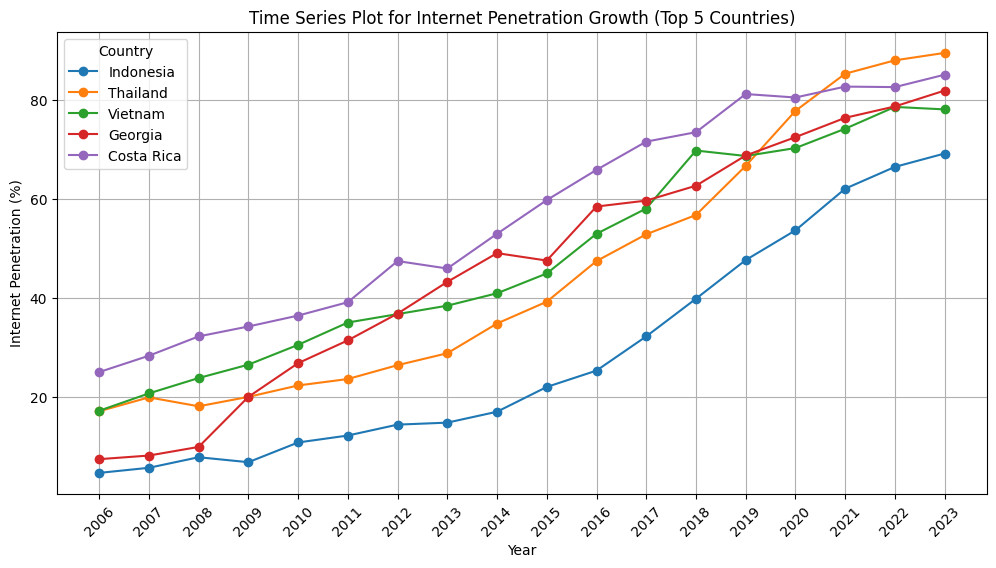

In [29]:
# Get the top 5 countries with the highest internet penetration growth
top_5_countries = top_internet_growth.head(5).index

# Filter the original dataset for these countries
df_top_5 = df[df["country"].isin(top_5_countries)]

# Plot time series for internet penetration growth over the last 10 years
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = df_top_5[df_top_5["country"] == country]
    plt.plot(country_data["year"], country_data["internet_users_value"], marker="o", label=country)
plt.xticks(np.arange(df_top_5["year"].min(), df_top_5["year"].max() + 1, 1), rotation=45)
# Plot formatting
plt.title("Time Series Plot for Internet Penetration Growth (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Internet Penetration (%)")
plt.legend(title="Country")
plt.grid(True)

# Show the plot
plt.show()

### **Refined Insights on Internet Penetration Growth (Based on Time Series Analysis)**  

Our **time series analysis** reveals a more refined perspective on **internet penetration trends**, showing that while **Indonesia had the highest percentage growth (364%)**, it **lagged behind in absolute penetration compared to Thailand, Costa Rica, Georgia, and Vietnam from 2018 onward**.

- **Thailand, Costa Rica, Georgia, and Vietnam had already surpassed Indonesia in internet penetration by 2018-2023**, suggesting they had an **earlier digital transformation**.  
- **Indonesia’s high growth rate** reflects **rapid infrastructure expansion**, but it started from a **lower baseline** and is still **catching up to more digitally mature countries**.  
- **Costa Rica had the highest internet penetration since 2006**, reinforcing its **early investment in digital accessibility**.  
- **Thailand and Vietnam show strong internet adoption trends post-2015**, overtaking Indonesia by 2019-2020.  
- **Georgia maintains steady and consistent growth**, positioning itself as an emerging digital hub.  

The new findings suggest that:
1. **Best-established digital hubs:**  
   - **Costa Rica, Thailand, and Georgia** offer **early and sustained internet penetration**, making them **reliable, well-connected destinations**.  
2. **Fast-growing but still catching up:**  
   - **Indonesia remains a strong contender**, but while its internet infrastructure is **expanding rapidly**, it still lags behind in absolute penetration.  
3. **Balanced digital transformation:**  
   - **Vietnam and Georgia provide both strong initial penetration and sustained increases**, making them **ideal for remote workers seeking long-term stability**.  

This updated analysis confirms that **growth rate alone does not indicate digital readiness**—absolute penetration levels matter in assessing which countries are truly **tech-ready for digital nomads**.  


### **3D Scatter Plot On Digital & Economic Growth Balance**  

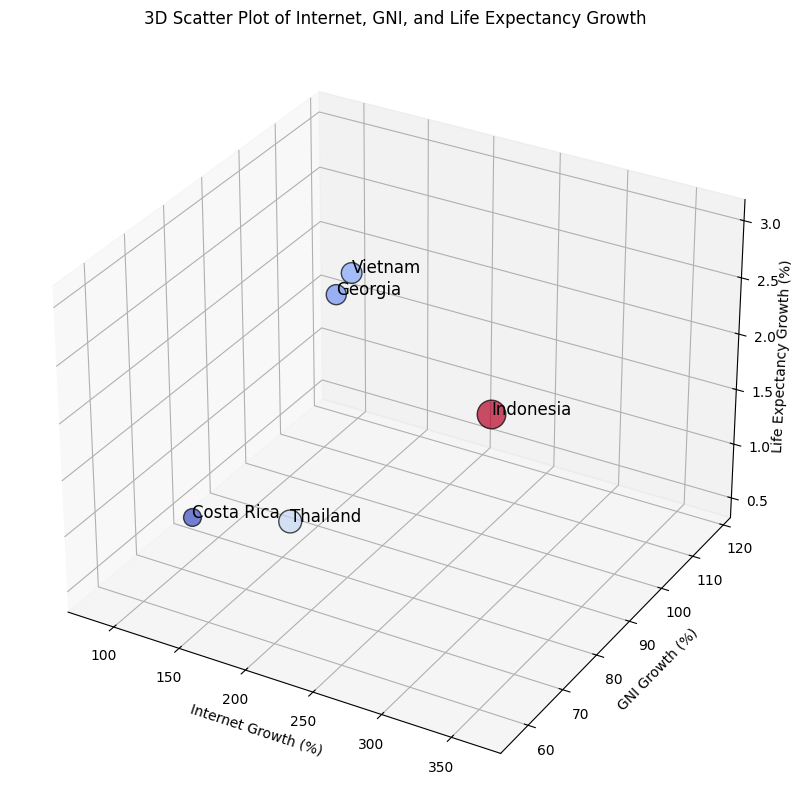

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get the top 5 countries for internet, GNI, and life expectancy growth
top_countries = top_countries_for_nomads.index

# Filter dataset for these top countries
df_top_countries = growth_comparison_2.loc[top_countries]

# Extract values for plotting
internet_growth_values = df_top_countries["internet_growth_percentage"]
gni_growth_values = df_top_countries["gni_growth_percentage"]
life_expectancy_growth_values = df_top_countries["life_expectancy_growth_percentage"]
combined_growth_scores = df_top_countries["combined_growth_score"]

# Create a 3D scatter plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with bubble sizes
scatter = ax.scatter(
    internet_growth_values, 
    gni_growth_values, 
    life_expectancy_growth_values, 
    s=combined_growth_scores,  # Bubble size based on combined growth score
    alpha=0.7, c=combined_growth_scores, cmap="coolwarm", edgecolors="k"
)

# Label axes
ax.set_xlabel("Internet Growth (%)")
ax.set_ylabel("GNI Growth (%)")
ax.set_zlabel("Life Expectancy Growth (%)", labelpad=-1)

ax.set_title("3D Scatter Plot of Internet, GNI, and Life Expectancy Growth")

# Add country labels
for country, x, y, z in zip(top_countries, internet_growth_values, gni_growth_values, life_expectancy_growth_values):
    ax.text(x, y, z, country, fontsize=12)

# Show plot
plt.show()

# This stackoverflow thread aids me on how to plot 3D scatter plot https://stackoverflow.com/questions/77883905/it-seems-from-mpl-toolkits-mplot3d-import-axes3d-does-not-work-anymore-how-ca

### **Key Findings & Alignment with EDA Insights:**  
- **Indonesia leads in internet growth but lags in life expectancy improvements**  
  - Our EDA previously suggested Indonesia had **364% internet growth and 56.7% GNI growth**, yet life expectancy growth remains **low (1.5%)**, reinforcing the idea that **economic gains may not be equally translating into healthcare improvements.**  
- **Vietnam & Georgia show balanced digital-economic transformation**  
  - The plot confirms that both **Vietnam and Georgia excel in GNI growth (117%)**, with **moderate but steady life expectancy gains**. This supports the finding that these nations are **rapidly industrializing while also improving well-being.**  
- **Thailand & Costa Rica have moderate overall growth**  
  - **Thailand and Costa Rica appear closer in the lower-middle of the plot**, confirming that their life expectancy growth is **modest** despite strong digital expansion (**209% and 85% internet growth, respectively**).  

## Conclusions and Recommendations

### Key Findings
1. **Internet Penetration Growth is a Key Indicator of Digital Readiness**  
   - Countries like **Indonesia, Thailand, Vietnam, Georgia, and Costa Rica** have seen rapid internet penetration growth.
   - **Indonesia leads with a 364% increase**, signaling strong digital infrastructure investment.
   - However, some countries have **higher absolute internet penetration**, suggesting they reached digital maturity earlier.

2. **Economic Development Correlates with Internet and Life Expectancy Growth**  
   - **GNI per capita shows a strong positive correlation (0.79) with internet penetration** and (0.77) with life expectancy.
   - **Vietnam and Georgia exhibit significant economic growth (GNI +117%)**, making them promising for long-term livability.
   - **Costa Rica and Thailand show moderate economic and digital growth**, ensuring balanced development.

3. **Happiness Growth is Not Always Linked to Economic Gains**  
   - **Vietnam (+26.1%) and Georgia (+22.9%) show the highest happiness growth**, suggesting well-being improvements beyond financial growth.
   - **Indonesia, despite its high GNI and internet growth, has lower happiness growth (7.75%)**, indicating potential quality-of-life concerns.

4. **Digital Nomad-Friendly Destinations**  
   - **Best Digital Hubs:** **Costa Rica, Thailand, Georgia** (Strong internet access, visa policies, and stable economies).
   - **Fast-Growing but Catching Up:** **Indonesia** (Rapid growth but still improving infrastructure).
   - **Balanced Work-Life Destinations:** **Vietnam and Georgia** (Affordable, high growth, and improving well-being).

### Recommendations
1. **For Digital Nomads:**  
   - Consider **Vietnam and Georgia** for affordability, economic growth, and quality of life.
   - If prioritizing **internet infrastructure**, **Costa Rica, Thailand, and Georgia** offer the best connectivity.
   - Summary table of key digital nomad destinations:
| **Country**    | **Affordability** | **Well-being** | **Internet Growth** | **Happiness Score Growth** |
|--------------|----------------|--------------|-----------------|----------------------|
| **Vietnam**  | ✅ Low Cost    | ✅ High      | ✅ Fast-growing  | ✅ Strong increase  |
| **Georgia**  | ✅ Low Cost    | ✅ High      | ✅ Good          | ✅ Strong increase  |
| **Indonesia** | ✅ Low Cost    | ⚠️ Moderate  | ✅ Leading growth | ❌ Low increase    |
| **Costa Rica** | ❌ Expensive  | ✅ High      | ✅ High          | ✅ Stable           |
| **Thailand**  | ⚠️ Moderate   | ✅ High      | ✅ High          | ✅ Stable           |


2. **For Policymakers & Governments:**  
   - Continue **investing in digital infrastructure** to support economic and remote work growth.
   - Countries with **strong economic growth but lower happiness (e.g., Indonesia)** should focus on **social well-being policies**.

3. **For Future Research:**  
   - Analyze **visa policies and taxation for remote workers** to refine country recommendations.
   - Investigate how **cost of living impacts digital nomad decision-making** alongside digital and economic growth.